<a href="https://colab.research.google.com/github/RaiqaRasool/ml_training/blob/main/4_Tensor_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Torch Tensor Visualization

In [ ]:
import torch
v1=torch.ones(2,2) # (row,col)
v1

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
v2=torch.ones(2,2,5) # (channel, row, col)
v2

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [ ]:
v3=torch.ones(5,2,2,5) # (batch_size, channel, row, col)
v3

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])

## Numpy Tensor Visualization

In [ ]:
import numpy as np
np1=np.ones((2,2))
np1

array([[1., 1.],
       [1., 1.]])

In [ ]:
np2=np.ones((2,2,5)) # (channel, row, col)
np2

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [ ]:
np3=np.ones((5,2,2,5)) # (batch_size, channel, row, col)
np3

array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]])

## Memory storage of Tensor

**Contiguous array:**
The commonly used way to store such data is in a single array that is laid out as a single, contiguous block within memory. More concretely, a 3x3x3 tensor would be stored simply as a single array of 27 values, one after the other.

The only place where the dimensions are used is to calculate the mapping between the (many) coordinates and the offset within that array. For example, to fetch the item [3, 1, 1] you would need to know if it is a 3x3x3 matrix, a 9x3x1 matrix, or a 27x1x1 matrix - in all cases the "storage" would be 27 items long, but the interpretation of "coordinates" would be different. If you use zero-based indexing, the calculation is trivial, but you need to know the length of each dimension.

This does mean that resizing and similar operations may require copying the whole array, but that's ok, you trade off the performance of those (rare) operations to gain performance for the much more common operations, e.g. sequential reads

Sure, let's use a practical example with a 3x3x3 tensor, which is essentially a three-dimensional array of numbers. Consider a tensor representing the RGB values of a 3x3 image:

```python
# Original 3x3x3 tensor representing an image
tensor_3x3x3 = [
    [[r00, g00, b00], [r01, g01, b01], [r02, g02, b02]],
    [[r10, g10, b10], [r11, g11, b11], [r12, g12, b12]],
    [[r20, g20, b20], [r21, g21, b21], [r22, g22, b22]]
]
```

Now, let's flatten this tensor into a contiguous array:

```python
# Flattened contiguous array
flat_array = [r00, g00, b00, r01, g01, b01, r02, g02, b02,
              r10, g10, b10, r11, g11, b11, r12, g12, b12,
              r20, g20, b20, r21, g21, b21, r22, g22, b22]
```

To find the RGB values at coordinates [2, 1, 0] in the original tensor, you need to do some calculations based on the dimensions. The formula would be:

```python
# Formula for calculating the index in the flattened array
index = 2 * (3 * 3) + 1 * 3 + 0
```

Now, you can use this index to access the corresponding values in the flattened array:

```python
# Accessing values in the flattened array using the calculated index
rgb_values = flat_array[index]
```

In this example, if you were using a zero-based indexing system, you'd find the RGB values at coordinates [2, 1, 0] in the original tensor by accessing the element at index 21 in the flattened array.

This way of organizing data makes sequential operations, like reading all the RGB values sequentially, very efficient. However, if you want to resize the image or perform other operations that change the dimensions, you might need to rearrange the data, which could be less efficient.

In [ ]:
v4=torch.empty(3,3,3)
v4

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00, -2.8733e+26,  3.1281e-41],
         [-7.6040e+24,  3.1281e-41, -6.4386e-05]],

        [[ 4.3629e-41,  1.4013e-45,  0.0000e+00],
         [ 3.7835e-44,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.4013e-45,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])

### Channel First Versus Channel Last


In a convolutional neural network (CNN), one of the fundamental operations is the convolution operation, where a filter (also called a kernel) is applied to the input image to produce a feature map. The efficiency of performing convolutions can be influenced by how the data is laid out in memory.

Consider a convolution operation that involves a filter sliding over an input image. Each position of the filter involves a set of multiplications and additions. The order in which these multiplications and additions occur can impact the efficiency of computation due to cache locality and memory access patterns.

1. **Contiguous Memory Access:**
   - Many modern CPUs and GPUs have cache systems that operate more efficiently when memory accesses are contiguous.
   - When the channel dimension is the innermost dimension (last in memory), consecutive elements in the channel are often accessed together, leading to better cache locality.

   Example (TensorFlow convention):
   ```python
   # TensorFlow convention: (height, width, channels)
   image_tf = tf.constant(...)  # Assuming a TensorFlow tensor
   conv_result_tf = tf.nn.conv2d(image_tf, filter_tf, strides=[1, 1, 1, 1], padding='SAME')
   ```

2. **Channel-First (PyTorch Convention):**
   - In the PyTorch convention (channels, height, width), the channel dimension is the innermost dimension.
   - This layout may lead to better performance in certain convolution implementations optimized for this memory order.

   Example (PyTorch convention):
   ```python
   # PyTorch convention: (channels, height, width)
   image_pt = torch.tensor(...)  # Assuming a PyTorch tensor
   conv_result_pt = F.conv2d(image_pt, filter_pt, stride=1, padding=1)
   ```

It's important to note that the impact on performance might vary depending on the specific convolution implementation and the hardware architecture. In many cases, modern deep learning libraries, like TensorFlow and PyTorch, are optimized to handle these details for you, and the difference might not be significant for typical use cases.

Ultimately, the choice of channel order is often guided by the conventions of the deep learning framework being used, and these frameworks are designed to handle the underlying performance considerations.

In [ ]:
v6=torch.tensor([
              [
               [1,2,3],
               [4,5,6],
               [7,8,9],
               ],
               [
               [10,11,12],
               [13,14,15],
               [16,17,18],
               ],
               [
               [10,11,12],
               [13,14,15],
               [16,17,18],
               ]
              ])
v6.shape

torch.Size([3, 3, 3])

In [ ]:
v6[2,1,1]

tensor(14)

## Image Tensor Visualization

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

train_set=torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100%|██████████| 9912422/9912422 [00:00<00:00, 100744664.79it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65161750.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29173836.77it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20528587.03it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
image,label=train_set[0]
image.shape

torch.Size([1, 28, 28])

In [ ]:
image[0,:10,:10]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1176,
         0.1412],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1922, 0.9333,
         0.9922],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0706, 0.8588,
         0.9922],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3137,
         0.6118]])

In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

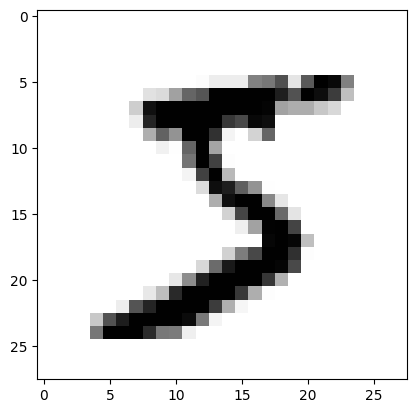

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image.view(28,28,1),cmap='gray_r')

In [ ]:
image.view(28,28,1)

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [